# Industrial_Copper_Modeling

In [1]:
# imporing all libriries

#Importing Libaries for creating dataframe , Indexing and Slicing , streamlit web
import pandas as pd
import numpy as np
import streamlit as st

#Importing Libaries for process of building and deploying machine learning models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer 

#Importing Libaries for modeling and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.inspection import permutation_importance

#Importing libraries for plotting graph
import seaborn as sns
import matplotlib.pyplot as plt

# Importing libraries for Representing Dates and Times
import time
from datetime import datetime
start_time = time.time()

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelBinarizer
import streamlit as st
import re
import pickle
from streamlit_option_menu import option_menu

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
df=pd.read_excel(r"D:\COPPER XLSX FILES\Copper_Set.xlsx")
df

,id,item_date,quantity_tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


# number of unique values in specific columns in DataFrame

In [4]:
# number of unique values in specific columns in DataFrame

print("Unique values in 'item_date':", len(df['item_date'].unique()))
print("Unique values in 'customer':", len(df['customer'].unique()))
print("Unique values in 'material_ref':", len(df['material_ref'].unique()))
print("Unique values in 'product_ref':", len(df['product_ref'].unique()))
print("Unique values in 'delivery date':", len(df['delivery date'].unique()))

Unique values in 'item_date': 253
Unique values in 'customer': 1170
Unique values in 'material_ref': 16564
Unique values in 'product_ref': 33
Unique values in 'delivery date': 29


#Handling missing values

In [5]:
# Handling missing values

missing_values_count = df.isnull().sum()
print(missing_values_count)

id                   2
item_date            1
quantity_tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity_tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [7]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [8]:
df.dtypes

id                object
item_date        float64
quantity_tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

# Categorial variables have to be converted through encoder, but other variables can be corrected to their correct format

In [9]:
#Categorial variables have to be converted through encoder, but other variables can be corrected to their correct format

df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date                  #Date format
df['quantity_tons'] = pd.to_numeric(df['quantity_tons'], errors='coerce')                                    #Numeric format
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date         #Date format
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')                                   #Numeric format

In [10]:
df

,id,item_date,quantity_tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,2020-07-01,601.00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity_tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


In [12]:
df.describe()

,quantity_tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05
mean,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918036e+03
std,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.317956e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [13]:
df.isnull().sum()

id                   2
item_date            3
quantity_tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [14]:
df['material_ref'].fillna('unknown', inplace=True)

In [15]:
df.isnull().sum()

id                2
item_date         3
quantity_tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

In [16]:
df = df.dropna()

In [17]:
df

,id,item_date,quantity_tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,2020-07-01,601.00


In [18]:
df.isnull().sum()

id               0
item_date        0
quantity_tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [19]:
edf=df.copy()

In [20]:
df.isnull().sum()

id               0
item_date        0
quantity_tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [21]:
df

,id,item_date,quantity_tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,2020-07-01,601.00


In [28]:
print(edf.columns)

Index(['id', 'item_date', 'quantity_tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')


In [29]:
# Check for leading/trailing spaces

edf.columns = edf.columns.str.strip()

In [ ]:
sns.distplot(ax=axes[0, 1], a=edf['quantity_tons'])  # Corrected column name

# Create a figure with 6 subplots

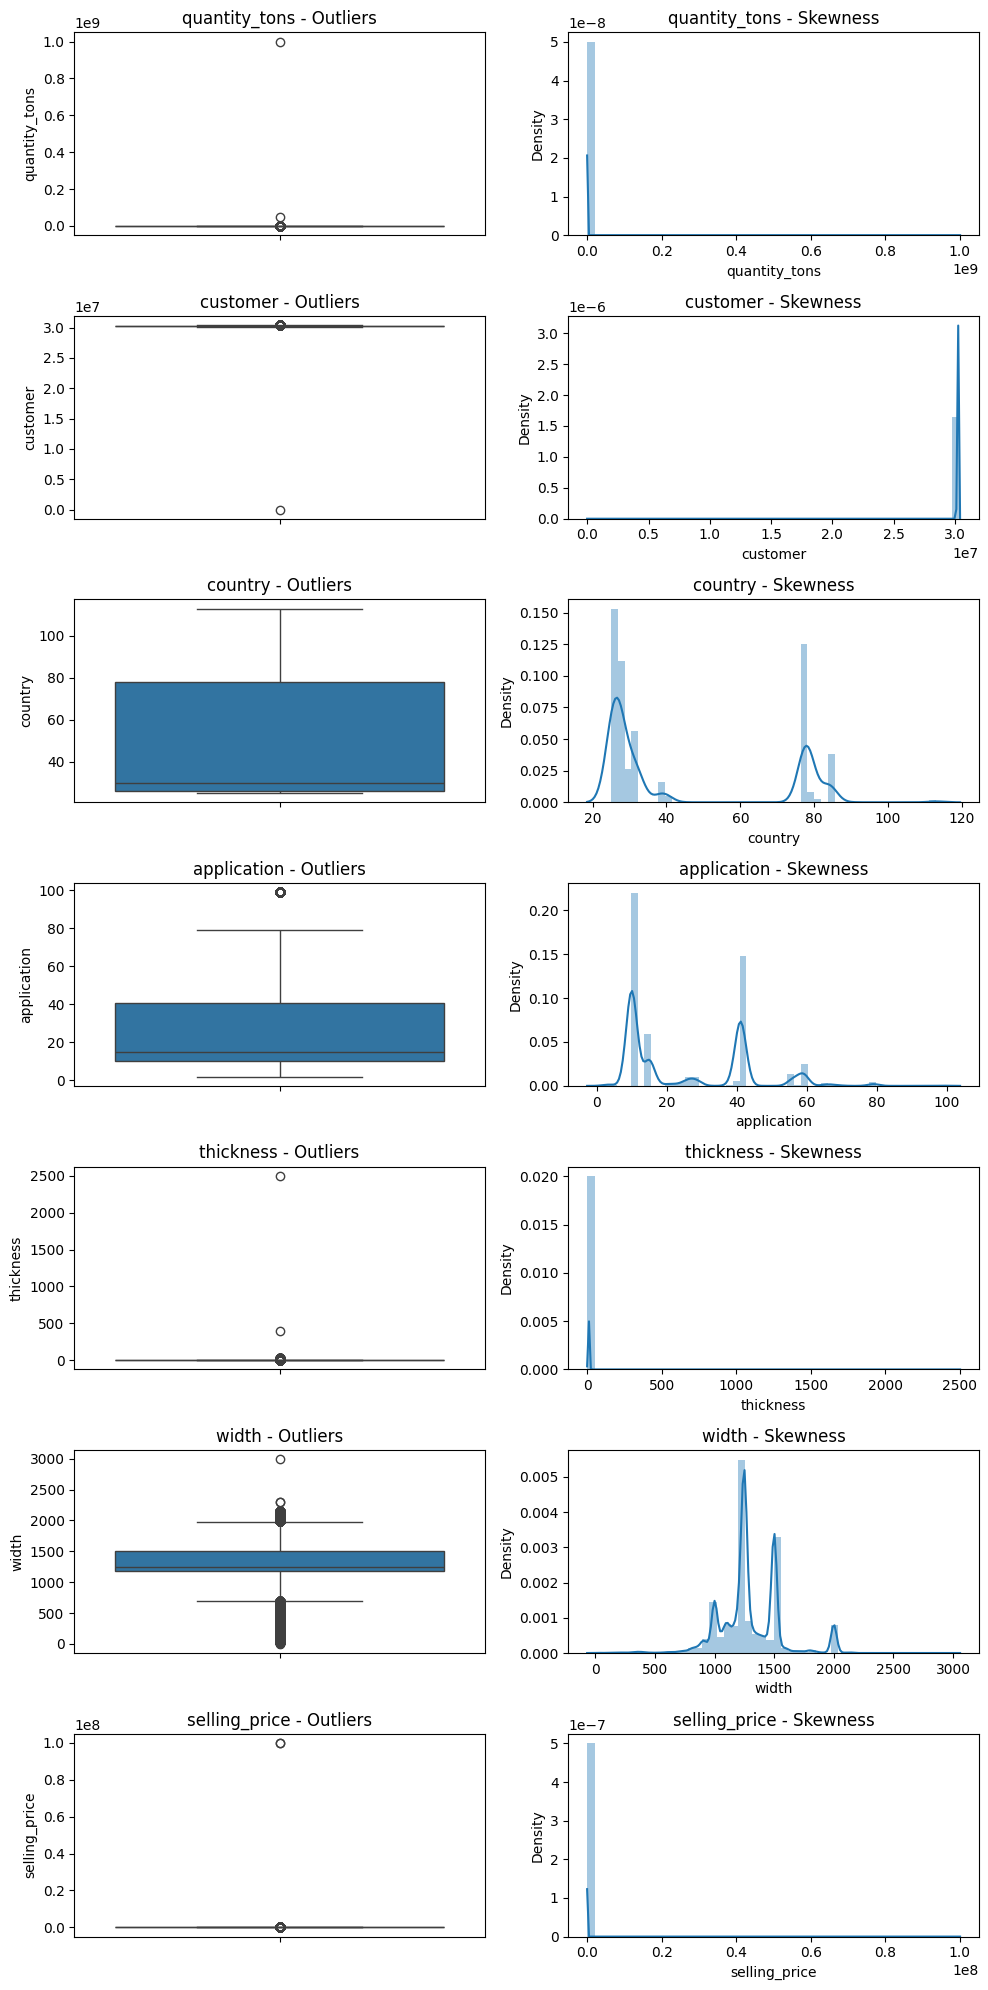

In [30]:
# Create a figure with 6 subplots
fig, axes = plt.subplots(7, 2, figsize=(10,20))
 
sns.boxplot(ax=axes[0, 0], data=edf['quantity_tons'])      #quantity tons
axes[0, 0].set_title('quantity_tons - Outliers')
sns.distplot(ax=axes[0, 1], a=edf['quantity_tons'])
axes[0, 1].set_title('quantity_tons - Skewness')

sns.boxplot(ax=axes[1, 0], data=edf['customer'])          #customer
axes[1, 0].set_title('customer - Outliers')
sns.distplot(ax=axes[1, 1], a=edf['customer'])
axes[1, 1].set_title('customer - Skewness')

sns.boxplot(ax=axes[2, 0], data=edf['country'])           #country
axes[2, 0].set_title('country - Outliers')
sns.distplot(ax=axes[2, 1], a=edf['country'])
axes[2, 1].set_title('country - Skewness')

sns.boxplot(ax=axes[3, 0], data=edf['application'])       #application
axes[3, 0].set_title('application - Outliers')
sns.distplot(ax=axes[3, 1], a=edf['application'])
axes[3, 1].set_title('application - Skewness')

sns.boxplot(ax=axes[4, 0], data=edf['thickness'])        #thickness
axes[4, 0].set_title('thickness - Outliers')
sns.distplot(ax=axes[4, 1], a=edf['thickness'])
axes[4, 1].set_title('thickness - Skewness')

sns.boxplot(ax=axes[5, 0], data=edf['width'])            #width
axes[5, 0].set_title('width - Outliers')
sns.distplot(ax=axes[5, 1], a=edf['width'])
axes[5, 1].set_title('width - Skewness')

sns.boxplot(ax=axes[6, 0], data=edf['selling_price'])   #selling_price
axes[6, 0].set_title('selling_price - Outliers')
sns.distplot(ax=axes[6, 1], a=edf['selling_price'])
axes[6, 1].set_title('selling_price - Skewness')

plt.tight_layout()                                      #Adjusts the layout of the plots to prevent overlapping.
plt.show()                                              #dissplay the plots

In [27]:
print(edf.columns)

Index(['id', 'item_date', 'quantity_tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')


#  identify and replace values in  DataFrame (edf) based on certain conditions

In [31]:
#  identify and replace values in DataFrame (edf) based on certain conditions

mask1 = edf['selling_price'] <= 0                                            # Handling 'selling_price' values less than or equal to 0
print(mask1.sum())
edf.loc[mask1, 'selling_price'] = np.nan                     

mask1 = edf['quantity_tons'] <= 0                                            # Handling 'quantityt_ons' values less than or equal to 0
print(mask1.sum())
edf.loc[mask1, 'quantity_tons'] = np.nan

mask1 = edf['thickness'] <= 0                                                # Handling 'thickness' values less than or equal to 0
print(mask1.sum())

7
4
0


In [32]:
edf.isnull().sum()

id               0
item_date        0
quantity_tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [33]:
edf.dropna(inplace=True)

# applying a logarithmic transformation to  columns in  DataFrame

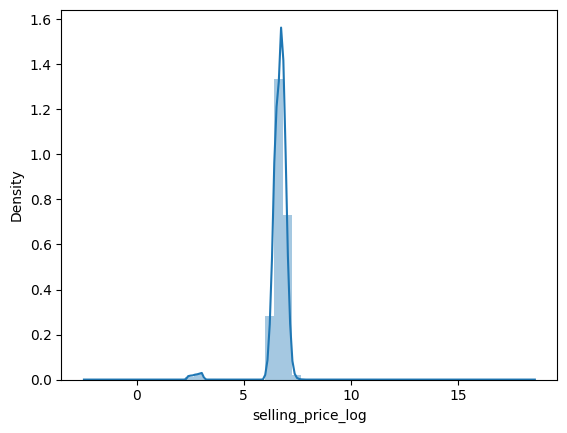

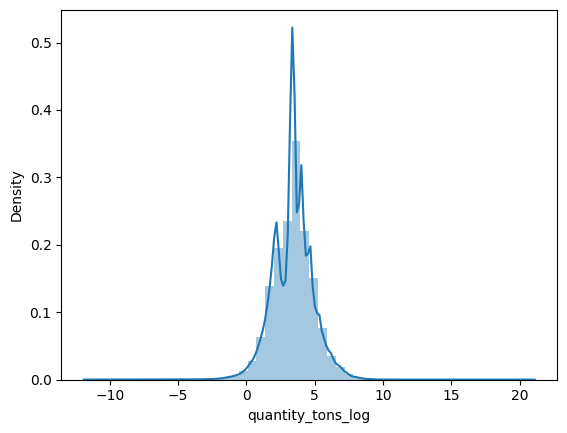

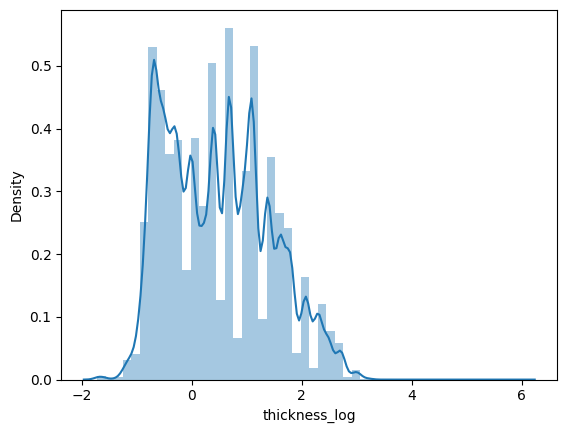

In [34]:
# applying a logarithmic transformation to  columns in  DataFrame

edf['selling_price_log'] = np.log(edf['selling_price'])             #transforming selling_price column
sns.distplot(edf['selling_price_log'])
plt.show()

edf['quantity_tons_log'] = np.log(edf['quantity_tons'])             #transforming quantity_tons column
sns.distplot(edf['quantity_tons_log'])
plt.show()

edf['thickness_log'] = np.log(edf['thickness'])                     #transforming thickness column   
sns.distplot(edf['thickness_log'])
plt.show()

In [35]:
edf.isnull().sum()

id                   0
item_date            0
quantity_tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
delivery date        0
selling_price        0
selling_price_log    0
quantity_tons_log    0
thickness_log        0
dtype: int64

#  the correlation matrix for a subset of columns from the DataFrame edf and then visualizing the correlation matrix using a heatmap

<Axes: >

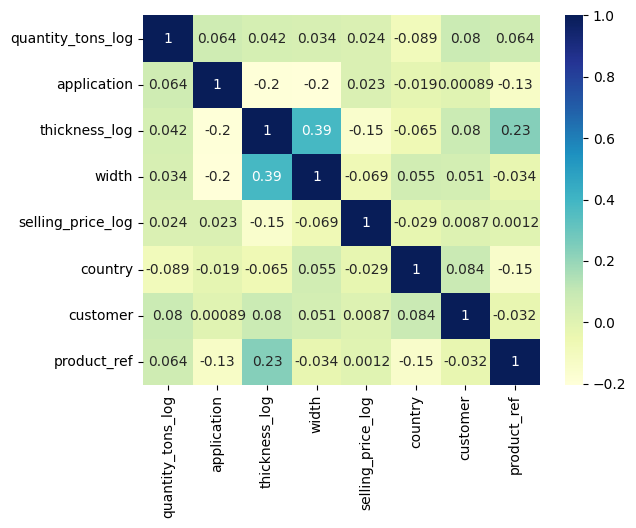

In [37]:
#  the correlation matrix for a subset of columns from the DataFrame edf and then visualizing the correlation matrix using a heatmap

x=edf[['quantity_tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()
sns.heatmap(x, annot=True, cmap="YlGnBu")

# REGRESSION M0DEL AND ANALYSIS

In [39]:
# REGRESSION M0DEL AND ANALYSIS
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Assuming  DataFrame 'edf'

X = edf[['quantity_tons_log', 'status', 'item type', 'application', 'thickness_log', 'width', 'country', 'customer', 'product_ref']]
y = edf['selling_price_log']

# Encoding categorical variables
#item_type
OHE = OneHotEncoder(handle_unknown='ignore')
OHE.fit(X[['item type']])
X_OHE = OHE.transform(X[['item type']]).toarray()

#status
OHE2 = OneHotEncoder(handle_unknown='ignore')
OHE2.fit(X[['status']])
X_OHE2 = OHE2.transform(X[['status']]).toarray()

# Independent features after encoding
X = np.concatenate((X[['quantity_tons_log', 'application', 'thickness_log', 'width', 'country', 'customer', 'product_ref']].values, X_OHE, X_OHE2), axis=1)

# Scaling features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Decision tree
mdl = DecisionTreeRegressor()

# Hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

# GridSearchCV
grid_search = GridSearchCV(estimator=mdl, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean squared error: 0.027098441176006145
R-squared: 0.9158880224738256


# using trained model (best_model) to make predictions on a new sample. The data provided involves preparing the new sample by transforming it in a way similar to the training phase

In [40]:
# using trained model (best_model) to make predictions on a new sample. The data provided involves preparing the new sample by transforming it in a way similar to the training phase

# New sample data
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28, 30202938, 1670798778, 'PL', 'Won']])

# One-hot encode categorical variables for the new sample
new_sample_OHE = OHE.transform(new_sample[:, [7]]).toarray()
new_sample_OHE2 = OHE2.transform(new_sample[:, [8]]).toarray()

# Concatenate numerical and encoded features
new_sample = np.concatenate((new_sample[:, [0, 1, 2, 3, 4, 5, 6]], new_sample_OHE, new_sample_OHE2), axis=1)

# Standardize the features using the scaler
new_sample1 = scaler.transform(new_sample)

# Make predictions using the best_model
new_pred = best_model.predict(new_sample1)

# Display the predicted selling price (assuming it's a regression task)
print('Predicted selling price:', np.exp(new_pred))


Predicted selling price: [982.74615237]


# using the pickle module to save the trained model and associated preprocessing objects this allows to later load and use them without retraining.

In [41]:
# using the pickle module to save the trained model and associated preprocessing objects this allows to later load and use them without retraining.

# Saving the model
import pickle

# Save the best_model (DecisionTreeRegressor)
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Save the StandardScaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the OneHotEncoder for 'item type'
with open('item_type.pkl', 'wb') as f:
    pickle.dump(OHE, f)

# Save the OneHotEncoder for 'status'
with open('status.pkl', 'wb') as f:
    pickle.dump(OHE2, f)

In [45]:
#edf['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

# Now classification for "Status column" and Checking unique values in "Status"

In [ ]:
# Now classification for "Status column" and Checking unique values in "Status"

In [42]:
edf['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

# creating a new DataFrame cl_df by selecting rows from the original DataFrame edf where the 'status' column has values 'Won' or 'Lost'

In [43]:
cl_df = edf[edf['status'].isin(['Won', 'Lost'])]

In [44]:
# Now classification for "Status column" and Checking unique values in "Status"

cl_df['status'].unique()

array(['Won', 'Lost'], dtype=object)

# CLASSIFIER M0DEL AND ANALYSIS

# using a Decision Tree Classifier (DecisionTreeClassifier) for classification.

In [49]:
# using a Decision Tree Classifier (DecisionTreeClassifier) for classification.

from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming DataFrame 'cl_df'

# Separate the target variable 'status' and features
Y = cl_df['status']
X = cl_df[['quantity_tons_log', 'selling_price_log', 'item type', 'application', 'thickness_log', 'width', 'country', 'customer', 'product_ref']]

# One-hot encode categorical variable 'item type'
OHE = OneHotEncoder(handle_unknown='ignore')
X_OHE = OHE.fit_transform(X[['item type']]).toarray()

# Binarize the target variable 'status'
OHE2 = LabelBinarizer()
y = OHE2.fit_transform(Y)

# Concatenate numerical and encoded features
X = np.concatenate((X[['quantity_tons_log', 'selling_price_log', 'application', 'thickness_log', 'width', 'country', 'customer', 'product_ref']].values, X_OHE), axis=1)

# Standardize the features using the scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision tree classifier
mdl = DecisionTreeClassifier()
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9121850694675264
Confusion Matrix:
[[ 5687  1315]
 [ 1327 21757]]


# generating and displaying a Receiver Operating Characteristic (ROC) curve along with the Area Under the Curve (AUC) to evaluate the performance of classification model.

Confusion Matrix:
[[ 5687  1315]
 [ 1327 21757]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      7002
           1       0.94      0.94      0.94     23084

    accuracy                           0.91     30086
   macro avg       0.88      0.88      0.88     30086
weighted avg       0.91      0.91      0.91     30086



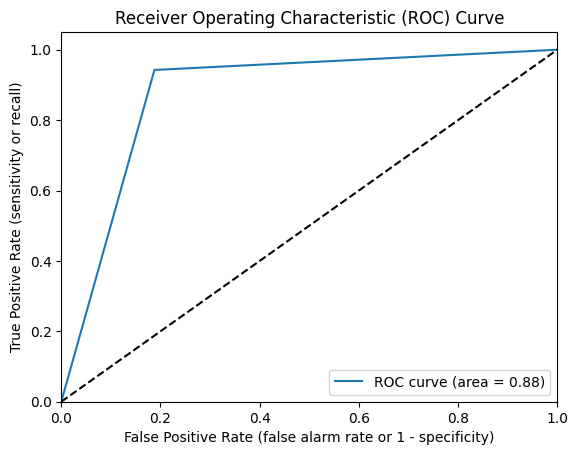

In [52]:
# generating and displaying a Receiver Operating Characteristic (ROC) curve along with the Area Under the Curve (AUC) to evaluate the performance of classification model.

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming predicted a y_pred using model and loaded y_test

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)                                                                   # Receiver Operating Characteristic (ROC) curve along with the Area Under the Curve (AUC)

# Plotting ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')                                                           # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (false alarm rate or 1 - specificity)')
plt.ylabel('True Positive Rate (sensitivity or recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# predicting the status for a new sample using a Decision Tree Classifier 

In [53]:
# predicting the status for a new sample using a Decision Tree Classifier 

# 'quantity tons_log', 'selling_price_log', 'application', 'thickness_log', 'width', 'country', 'customer', 'product_ref']].values, X_OHE
new_sample = np.array([[np.log(500), np.log(656), 8, np.log(2), 1000, 19, 31234938, 1270345178, 'W']])

new_sample_OHE = OHE.transform(new_sample[:, [8]]).toarray()

new_sample = np.concatenate((new_sample[:, [0, 1, 2, 3, 4, 5, 6, 7]], new_sample_OHE), axis=1)

new_sample = scaler.transform(new_sample)

new_pred = mdl.predict(new_sample)

if new_pred == 1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Lost


# using the pickle module to save the trained model and associated preprocessing objects this allows to later load and use them without retraining.

In [54]:
# Saving the model
import pickle

# Save the Decision Tree Classifier model
with open('c_bestmodel.pkl', 'wb') as file:
    pickle.dump(mdl, file)

# Save the StandardScaler
with open('cscaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Save the OneHotEncoder for 'item type'
with open('c_item_type.pkl', 'wb') as file:
    pickle.dump(OHE, file)

In [55]:
df

,id,item_date,quantity_tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [56]:
edf

,id,item_date,quantity_tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity_tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,6.468211,5.956169,-0.967584
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,6.643790,5.310301,0.832909
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.357842,6.666354,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,106.783299,30200854.0,25.0,Won,W,41.0,0.96,1240.0,1000222,164141591,2020-07-01,602.00,6.400257,4.670802,-0.040822
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00,6.381816,4.629691,-0.040822
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00,6.378426,5.337954,-0.051293
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00,6.428105,1.443523,-0.342490


In [57]:
df.dtypes

id                object
item_date        float64
quantity_tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity_tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


# STREAMLIT PART

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelBinarizer
import streamlit as st
import re
import pickle
from streamlit_option_menu import option_menu

st.set_page_config(layout="wide")

with st.sidebar:
    selected = option_menu("Main Menu", ["Basic Overview", "Data Prediction"],
                        styles={"nav-link": {"font": "sans serif", "font-size": "25px", "text-align": "centre"},
                                "nav-link-selected": {"font": "sans serif", "background-color": "#ff0bab"},
                                "icon": {"font-size": "20px"}
                                }
                        )

# -------------------------------------------------------------------------------------------------

if selected == "Basic Overview":
    st.markdown("<h1 style='text-align: center; font-size: 40px; color: #ff0bab;' ><u> Industrial Copper - Predictions </u> </h1>", unsafe_allow_html=True)
    st.markdown("### :green[Overview :] In this project, the goal is to design and implement a machine learning model to predict the selling price and status. The model leverage historical data from past transactions in Copper to predict accurate prices. ")
    st.markdown("### :blue The primary objective is to learn about ML predictions but it also provides a valuable tool which can be used for multiple prediction purposes")
    st.markdown("### :green[Libraries Used :] Streamlit, Pandas, numpy, pickle, Sklearn - Decision Tree Regression, re, etc")
    st.markdown("<h1 style='text-align: center; font-size: 40px; color: #ff0bab;'> <u> Created By Vikram Huggi</u> </h1", unsafe_allow_html=True)

if selected == "Data Prediction":

    st.write("""
    <div style='text-align:center'>
        <h1 style='color:#ff0bab;'>Industrial Copper Model- Predictions</h1>
    </div>
    """, unsafe_allow_html=True)

    tab1, tab2 = st.tabs(["Predict Selling Price", "Predict Status"]) 
    with tab1:    
            status_options = ['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM', 'Wonderful', 'Revised', 'Offered', 'Offerable']
            item_type_options = ['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR']
            country_options = [28., 25., 30., 32., 38., 78., 27., 77., 113., 79., 26., 39., 40., 84., 80., 107., 89.]
            application_options = [10., 41., 28., 59., 15., 4., 38., 56., 42., 26., 27., 19., 20., 66., 29., 22., 40., 25., 67., 79., 3., 99., 2., 5., 39., 69., 70., 65., 58., 68.]
            product=['611112', '611728', '628112', '628117', '628377', '640400', '640405', '640665', 
                        '611993', '929423819', '1282007633', '1332077137', '164141591', '164336407', 
                        '164337175', '1665572032', '1665572374', '1665584320', '1665584642', '1665584662', 
                        '1668701376', '1668701698', '1668701718', '1668701725', '1670798778', '1671863738', 
                        '1671876026', '1690738206', '1690738219', '1693867550', '1693867563', '1721130331', '1722207579']
            

            with st.form("my_form"):
                col1,col2,col3=st.columns([5,2,5])
                with col1:
                    st.write(' ')
                    status = st.selectbox("Status", status_options,key=1)
                    item_type = st.selectbox("Item Type", item_type_options,key=3)
                    country = st.selectbox("Country", sorted(country_options),key=4)
                    application = st.selectbox("Application", sorted(application_options),key=5)
                    product_ref = st.selectbox("Product Reference", product,key=6)
                with col3:               
                    quantity_tons = st.text_input("Enter Quantity Tons (Min:611728 & Max:1722207579)")
                    thickness = st.text_input("Enter thickness (Min:0.18 & Max:400)")
                    width = st.text_input("Enter width (Min:1, Max:2990)")
                    customer = st.text_input("customer ID (Min:12458, Max:30408185)")
                    submit_button = st.form_submit_button(label="PREDICT SELLING PRICE")
                    st.markdown("""
                        <style>
                        div.stButton > button:first-child {
                            background-color: #ff0bab;
                            color: white;
                            width: 100%;
                        }
                        </style>
                    """, unsafe_allow_html=True)
        
                flag=0 
                pattern = "^(?:\d+|\d*\.\d+)$"
                for i in [quantity_tons,thickness,width,customer]:             
                    if re.match(pattern, i):
                        pass
                    else:                    
                        flag=1  
                        break
                
            if submit_button and flag==1:
                if len(i)==0:
                    st.write("please enter a valid number space not allowed")
                else:
                    st.write("You have entered an invalid value: ",i)  
                
            if submit_button and flag==0:
                with open(r"D:\\OPPER XLSX FILES\\best_model.pkl", 'rb') as f:
                    loaded_model = pickle.load(f)
                with open(r"D:\\COPPER XLSX FILES\\scaler (1).pkl", 'rb') as f:
                    scaler_loaded = pickle.load(f)

                with open(r"D:\\COPPER XLSX FILES\\item_type.pkl", 'rb') as f:
                    t_loaded = pickle.load(f)

                with open(r"D:\\COPPER XLSX FILES\\status.pkl", 'rb') as f:
                    s_loaded = pickle.load(f)

                new_sample= np.array([[np.log(float(quantity_tons)),application,np.log(float(thickness)),float(width),country,float(customer),int(product_ref),item_type,status]])
                new_sample_ohe = t_loaded.transform(new_sample[:, [7]]).toarray()
                new_sample_be = s_loaded.transform(new_sample[:, [8]]).toarray()
                new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
                new_sample1 = scaler_loaded.transform(new_sample)
                new_pred = loaded_model.predict(new_sample1)[0]
                st.write('## :green[Predicted selling price:] ', np.exp(new_pred))
                
    with tab2: 
        
            with st.form("my_form1"):
                col1,col2,col3=st.columns([5,2,5])
                with col1:
                    cquantity_tons = st.text_input("Enter Quantity Tons (Min:611728 & Max:1722207579)")
                    cthickness = st.text_input("Enter thickness (Min:0.18 & Max:400)")
                    cwidth = st.text_input("Enter width (Min:1, Max:2990)")
                    ccustomer = st.text_input("customer ID (Min:12458, Max:30408185)")                  
                    cselling = st.text_input("Selling Price") 
                
                with col3:    
                    st.write(' ')
                    citem_type = st.selectbox("Item Type", item_type_options,key=10)
                    ccountry = st.selectbox("Country", sorted(country_options),key=11)
                    capplication = st.selectbox("Application", sorted(application_options),key=21)  
                    cproduct_ref = st.selectbox("Product Reference", product,key=31)           
                    csubmit_button = st.form_submit_button(label="PREDICT STATUS")
        
                cflag=0 
                pattern = "^(?:\d+|\d*\.\d+)$"
                for k in [cquantity_tons,cthickness,cwidth,ccustomer,cselling]:             
                    if re.match(pattern, k):
                        pass
                    else:                    
                        cflag=1  
                        break
                
            if csubmit_button and cflag==1:
                if len(k)==0:
                    st.write("please enter a valid number space not allowed")
                else:
                    st.write("You have entered an invalid value: ",k)  
                
            if csubmit_button and cflag==0:
                import pickle
                with open(r"D:\\COPPER XLSX FILES\\c_bestmodel.pkl", 'rb') as f:
                    cloaded_model = pickle.load(f)

                with open(r"D:\\COPPER XLSX FILES\\cscaler (1).pkl", 'rb') as f:
                    cscaler_loaded = pickle.load(f)

                with open(r"D:\\COPPER XLSX FILES\\c_item_type.pkl", 'rb') as f:
                    ct_loaded = pickle.load(f)

                # Predict the status for a new sample
                    
                # 'quantity_tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_OHE
                    
                new_sample = np.array([[np.log(float(cquantity_tons)), np.log(float(cselling)), capplication, np.log(float(cthickness)),float(cwidth),ccountry,int(ccustomer),int(product_ref),citem_type]])
                new_sample_ohe = ct_loaded.transform(new_sample[:, [8]]).toarray()
                new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
                new_sample = cscaler_loaded.transform(new_sample)
                new_pred = cloaded_model.predict(new_sample)
                if new_pred==1:
                    st.write('## :green[The Status is Won] ')
                else:
                    st.write('## :red[The status is Lost] ')